#### Importing the libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support


### Importing the dataset

In [55]:
df = pd.read_csv('Dataset/parkinsons.csv')
df.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Statistical analysis

In [56]:
df.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Individual Histogram for the numerical features

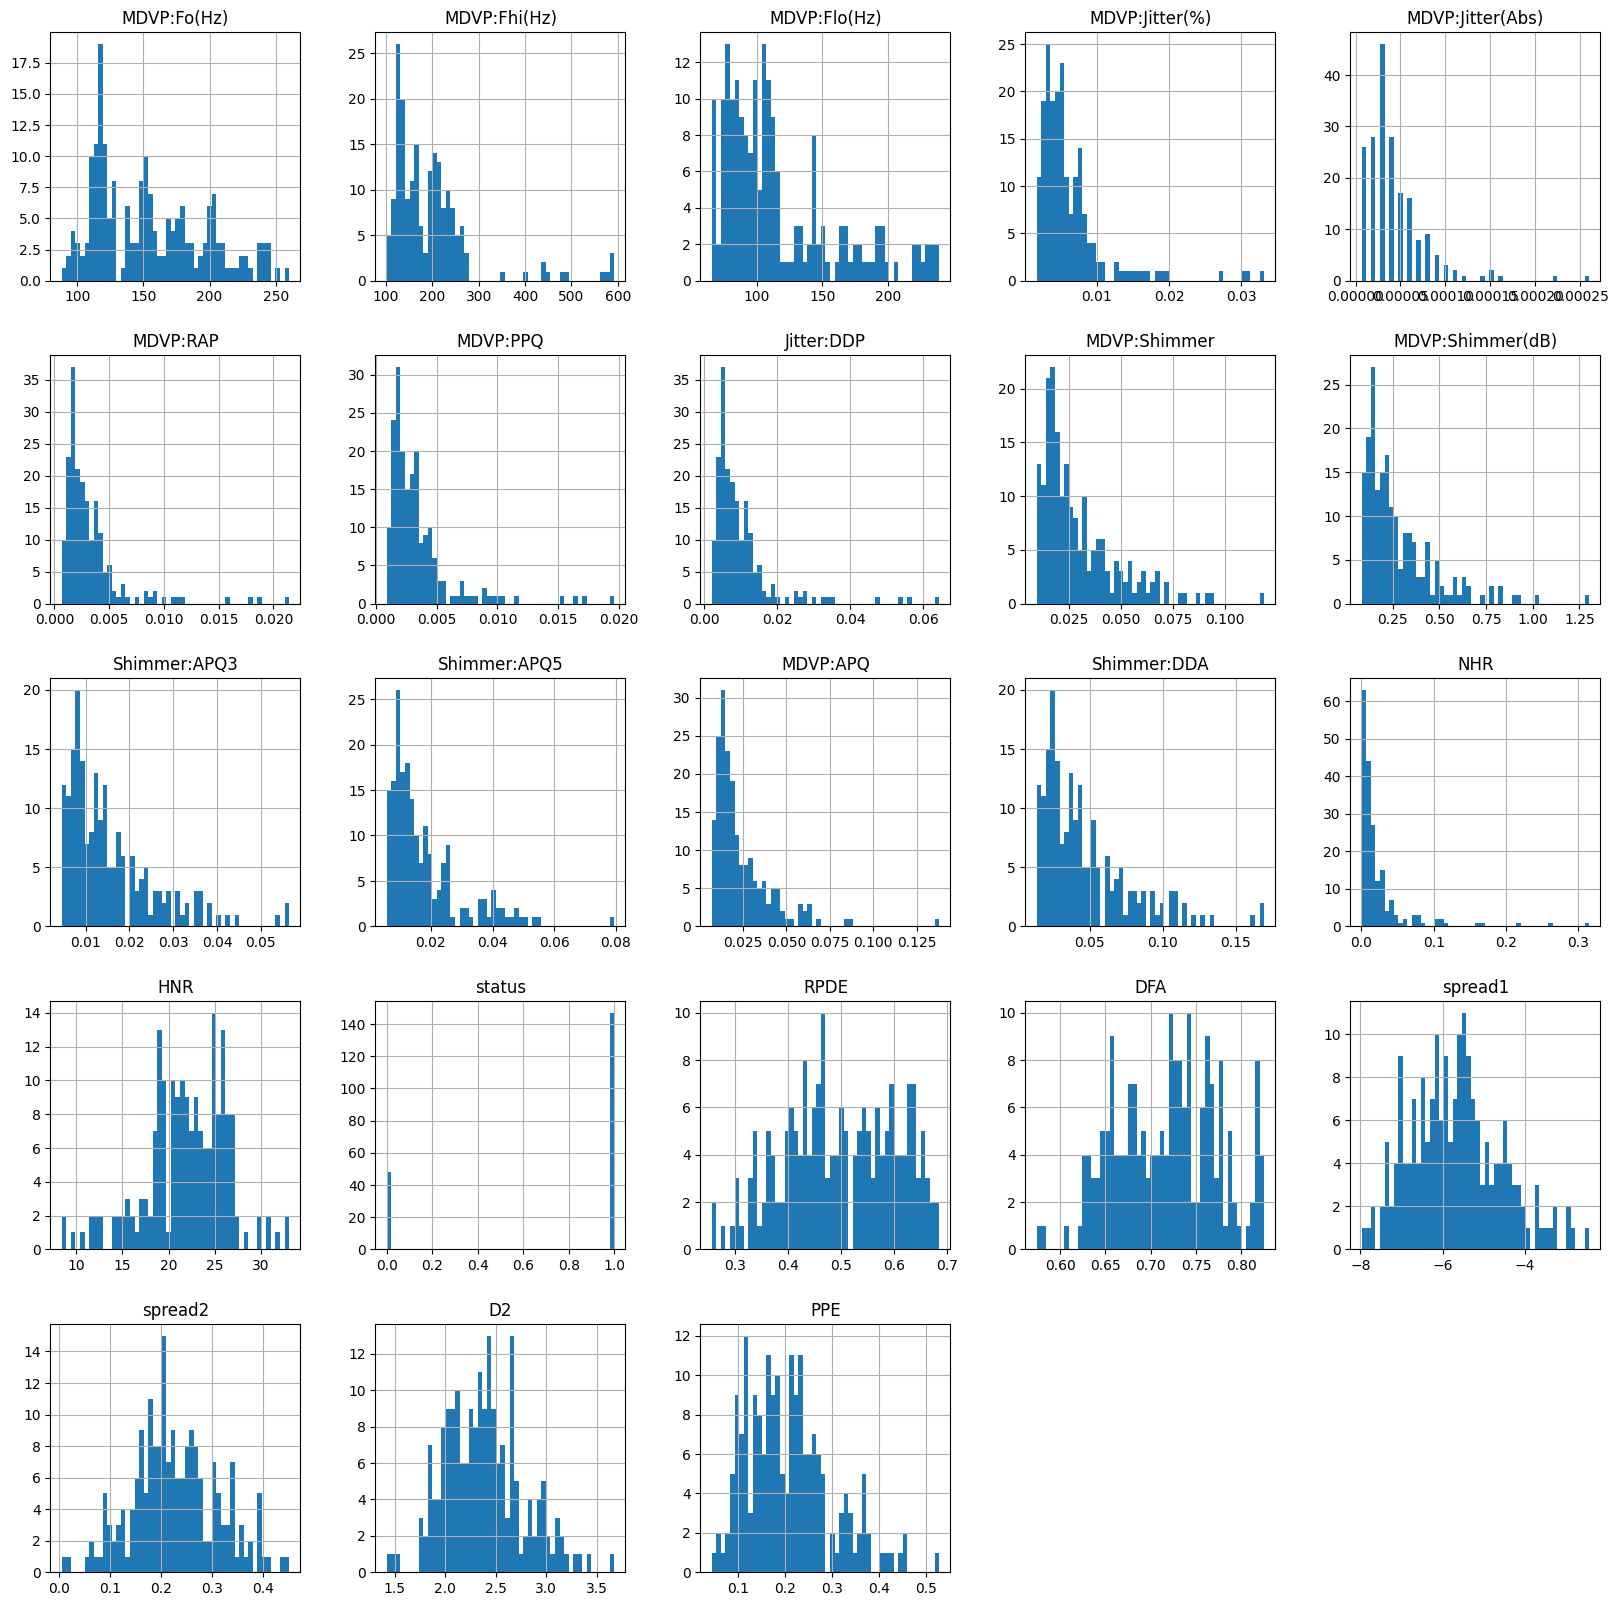

In [58]:

df.hist(bins=50, figsize=(20, 20))
plt.show()


### Individual Bar Chart for the categorical features

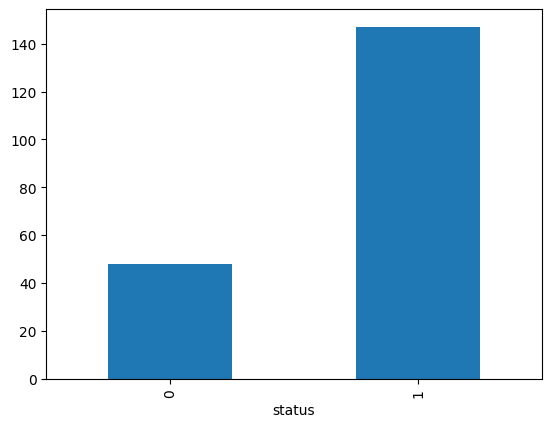

1    147
0     48
Name: status, dtype: int64

In [59]:

df.groupby('status').size()
df.groupby('status').size().plot(kind='bar')
plt.show()
df['status'].value_counts()


### Bar plot for Categorical vs categorical

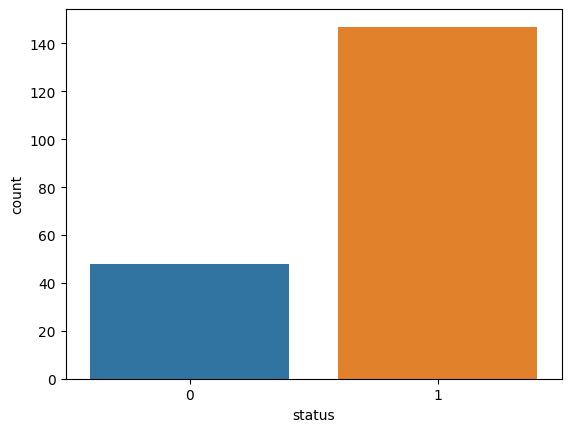

In [60]:
# Bar plot for Categorical vs categorical
sns.countplot(x='status', data=df)
plt.show()


### Categorical vs Numerical ( with different colors )

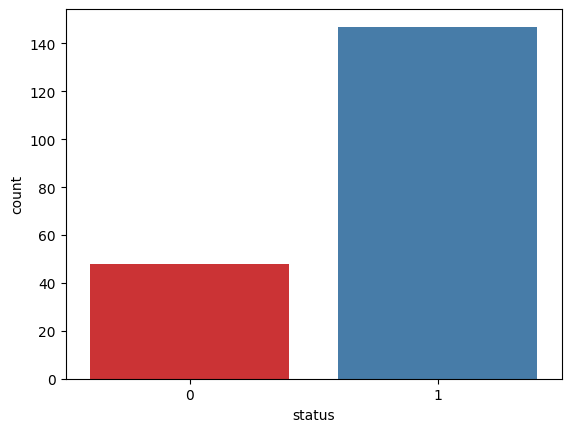

In [61]:
sns.countplot(x='status', data=df, palette='Set1')
plt.show()


### Missing data handling 

In [62]:
df.isnull().sum()


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Stratified sampling on output feature

In [63]:
df_train = df[df['status'] == 0]
df_test = df[df['status'] == 1]
print("Number of samples in training set:")
print(len(df_train))
print("Number of samples in testing set:")
print(len(df_test))
print("Number of features in the dataset:")
print(df.shape[1])
print("Number of features in the training set:")
print(df_train.shape[1])
print("Number of features in the testing set:")
print(df_test.shape[1])



Number of samples in training set:
48
Number of samples in testing set:
147
Number of features in the dataset:
24
Number of features in the training set:
24
Number of features in the testing set:
24


### One hot encoding for categorical features 

In [64]:
# type of features in the dataset
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

##### Encoding the Categorical values into numerical values is not required in this dataset. Because all values we have floating type only. we have name column as a categorical values but we are not going to use that column in model prediction.

##### So no need to apply label encoding...

In [65]:
df_train.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

###  Normalization / Standardization for numerical features

In [66]:
# Normalization-MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz) using min-max normalization method using sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']] = scaler.fit_transform(df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']])
df_train.head()



C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_5736\491946621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']] = scaler.fit_transform(df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']])


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,phon_R01_S07_1,0.578023,0.195010,0.714252,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
31,phon_R01_S07_2,0.592431,0.200477,0.714470,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
32,phon_R01_S07_3,0.586773,0.212372,0.720614,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
33,phon_R01_S07_4,0.612770,0.204850,0.744722,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
34,phon_R01_S07_5,0.618916,0.204687,0.739148,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,...,0.01403,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539


In [67]:
# Standardization MDVP:Fo(Hz),MDVP:Fhi(Hz)MD,VP:Flo(Hz) using sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']] = scaler.fit_transform(df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']])
df_train.head()


C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_5736\799748110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']] = scaler.fit_transform(df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']])


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,phon_R01_S07_1,0.290122,-0.174904,0.805749,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
31,phon_R01_S07_2,0.331364,-0.147572,0.806368,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
32,phon_R01_S07_3,0.315170,-0.088114,0.823791,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
33,phon_R01_S07_4,0.389587,-0.125715,0.892159,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
34,phon_R01_S07_5,0.407181,-0.126530,0.876352,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,...,0.01403,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539


### Correlation matrix

In [68]:
corr = df.corr()
corr


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


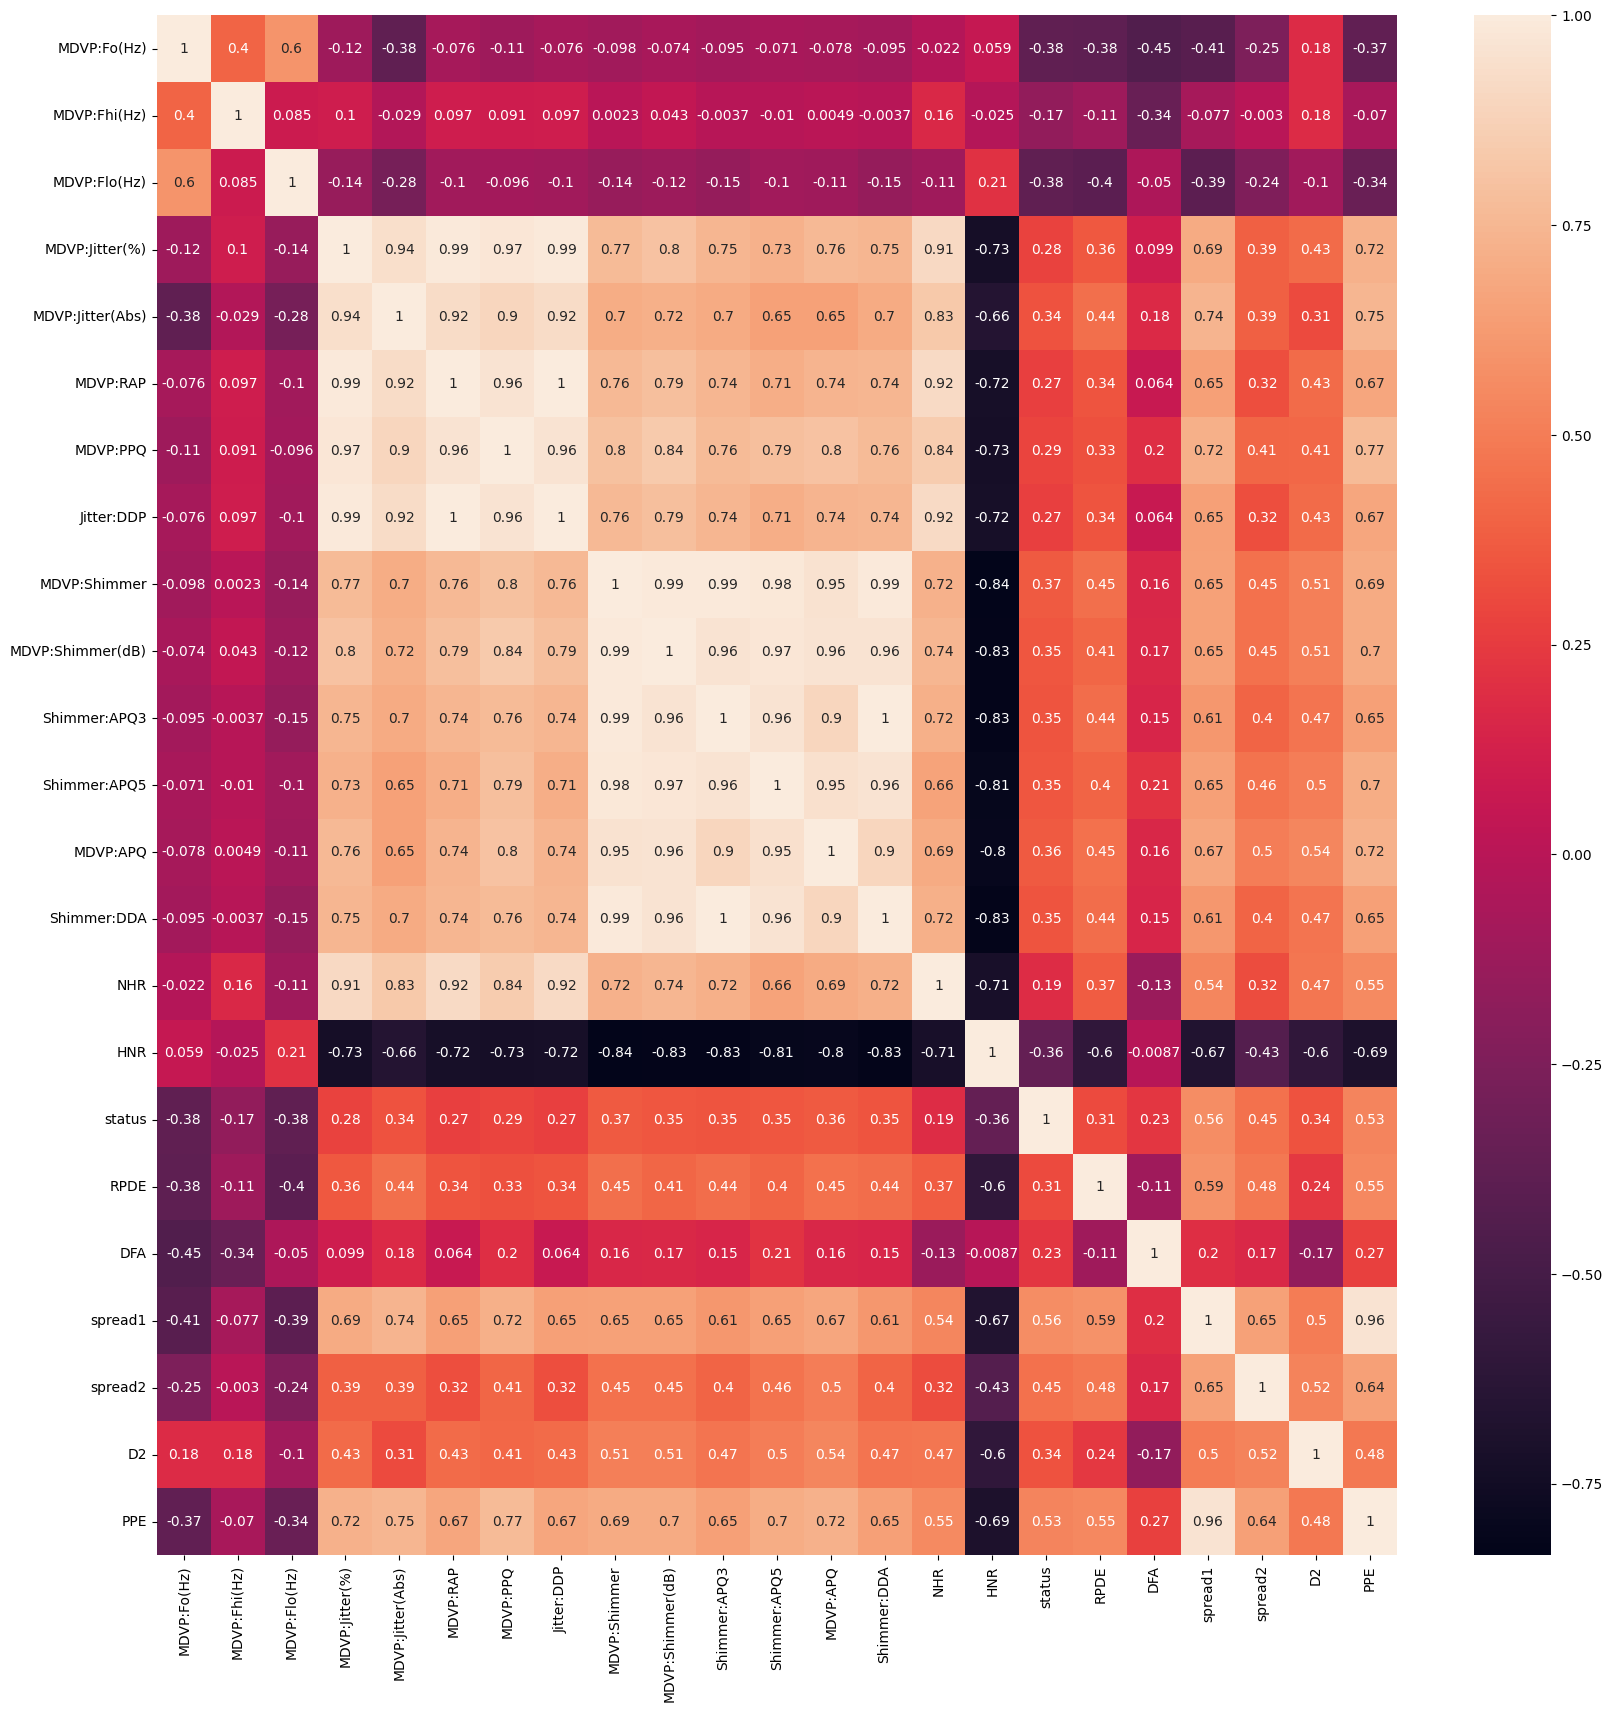

In [69]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()


### Dropping any feature if they seem extremely uncorrelated

In [70]:
# Drop status column from the dataset

df.drop('name', axis=1, inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Data balancing

#### The data is balanced perfectly. But because of teachers requirement i am going to balance the data using over sampling and under sampling.

In [71]:
# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df, df['status'])
X_res.shape, y_res.shape


((294, 23), (294,))

In [72]:
# Under sampling
from typing import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(df, df['status'])
print(sorted(Counter(y_resampled).items()))

[(0, 48), (1, 48)]


In [73]:
# Data Balance
df = pd.DataFrame(X_resampled, columns=df.columns)
df['status'] = y_resampled
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,197.076,206.896,192.055,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,0.097,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
1,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
2,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,0.111,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
3,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
4,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,0.01403,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539


In [74]:
# Print Balanced Data
df['status'].value_counts()


0    48
1    48
Name: status, dtype: int64

| Algorithm | Accuracy |
|-----------|----------|
| QDA |0.95 |
| KNN | 0.70|
| SVM | 0.95 |
| Decision tree| 0.80 |
|LDA|0.80|
|Naive Bayes algorithm|0.80|
|K-means|0.45|
|Random forest algorithm|0.90|
|AdaBoost|0.85|
|LSTM|0.70|
|XGBoost|0.85|
|Gradient Boosting|0.85|

### Model building

#### SVM

In [96]:
# Split the data into train and test set
X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Number of samples in training set:")
print(len(X_train))
print("Number of samples in testing set:")
print(len(X_test))

Number of samples in training set:
76
Number of samples in testing set:
20


In [106]:
# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.95


In [107]:
# K-flod in SVM
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.72 (+/- 0.38)


In [103]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# RMSE , MAE , RECALL ,Precisio, F1, R2 in svm
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


RMSE: 0.22360679774997896
MAE: 0.05
Recall: 0.8888888888888888
F1: 0.9411764705882353
R2: 0.797979797979798
Precision: 1.0


#### SVM
| Metric      | Score       |
|-------------|-------------|
| RMSE        | 0.2236068   |
| MAE         | 0.05        |
| Recall      | 0.8888889   |
| Precision   | 1.0         |
| F1          | 0.9411765   |
| R2          | 0.7979798   |
| k-fold Accuracy | 0.72 (+/- 0.38)  |


In [77]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [78]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7


In [108]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.95


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [109]:
# K-flod of QDA
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.41)


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mostafizur\

In [105]:
# RMSE , MAE , RECALL ,Precisio, F1, R2 in qda
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
 


RMSE: 0.22360679774997896
MAE: 0.05
Recall: 1.0
F1: 0.9473684210526316
R2: 0.797979797979798
Precision: 0.9


#### QDA
| Metric      | Score       |
|-------------|-------------|
| RMSE        | 0.2236068   |
| MAE         | 0.05        |
| Recall      | 1.0         |
| Precision   | 0.9         |
| F1          | 0.9473684   |
| R2          | 0.7979798   |
| k-fold Accuracy | 0.80 (+/- 0.41) |


In [80]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [81]:
#Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [82]:
#Random forest algorithm
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9


In [83]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
 

Accuracy: 0.8


In [84]:
#k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
y_pred = kmeans.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.45


In [85]:
#XGBoost
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [86]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [87]:
# LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling1D
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU
from keras.layers import PReLU
from keras.layers import ELU
from keras.layers import ThresholdedReLU
from keras.layers import Softmax
from keras.layers import ReLU
from keras.layers import Add
from keras.layers import Multiply
from keras.layers import Average
from keras.layers import Maximum
from keras.layers import Minimum
from keras.layers import Concatenate
from keras.layers import Dot
from keras.layers import GaussianNoise
from keras.layers import GaussianDropout
from keras.layers import AlphaDropout
from keras.layers import ActivityRegularization
from keras.layers import Masking


In [88]:
# Traing for parkinsons
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.array(y_train)
y_test = np.array(y_test)
  
# Traing the lstm
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
3/3 [==============================] - 18s 2s/step - loss: 0.6961 - accuracy: 0.4737 - val_loss: 0.6888 - val_accuracy: 0.4500
Epoch 2/10
3/3 [==============================] - 0s 127ms/step - loss: 0.6889 - accuracy: 0.5526 - val_loss: 0.6791 - val_accuracy: 0.7500
Epoch 3/10
3/3 [==============================] - 0s 114ms/step - loss: 0.6847 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4500
Epoch 4/10
3/3 [==============================] - 0s 149ms/step - loss: 0.7062 - accuracy: 0.4737 - val_loss: 0.6984 - val_accuracy: 0.4500
Epoch 5/10
3/3 [==============================] - 0s 151ms/step - loss: 0.6875 - accuracy: 0.5395 - val_loss: 0.6750 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 0s 135ms/step - loss: 0.6738 - accuracy: 0.6316 - val_loss: 0.6607 - val_accuracy: 0.7000
Epoch 7/10
3/3 [==============================] - 0s 116ms/step - loss: 0.6631 - accuracy: 0.6316 - val_loss: 0.6335 - val_accuracy: 0.7000
Epoch 8/10
3/3 [======

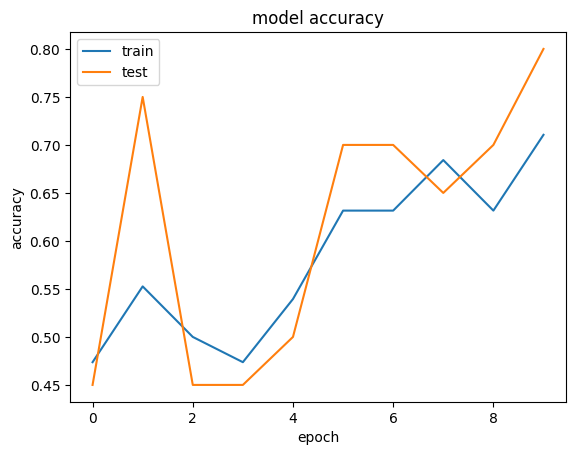

In [89]:
# Accuracy graph
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()